In [12]:
import pandas as pd
import CommonFunc


df = pd.read_csv('resources/CO2Emissions_Canada.csv')

In [13]:
from sklearn.preprocessing import LabelEncoder

#удаляем дубликаты
df.drop_duplicates()

#выделяем числовые данные
numdata = pd.DataFrame(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                           'CO2 Emissions(g/km)']])

# Делаем энкодинг для категориальных признаков
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()
label_encoder_3 = LabelEncoder()

vehicle_class = df[['Vehicle Class']].values.ravel()
fuel_type = df[['Fuel Type']].values.ravel()
transmission = df[['Transmission']].values.ravel()

encoded_vehicle_class = label_encoder_1.fit_transform(vehicle_class)
encoded_fuel_type = label_encoder_2.fit_transform(fuel_type)
encoded_transmission = label_encoder_3.fit_transform(transmission)

enc_1 = dict(zip(label_encoder_1.classes_,range(len(label_encoder_1.classes_))))
enc_2 = dict(zip(label_encoder_2.classes_,range(len(label_encoder_2.classes_))))
enc_3 = dict(zip(label_encoder_3.classes_,range(len(label_encoder_3.classes_))))

#Составляем матрицу данных X
X_ = numdata[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
X_['Vehicle Class'] = encoded_vehicle_class
X_['Transmission'] = encoded_fuel_type
X_['Fuel Type'] = encoded_transmission
feature_names = X_.columns
X=X_.values

#Составляем и упрощаем до одномерного массива набор целевой переменной
y = numdata[['CO2 Emissions(g/km)']].values.ravel()



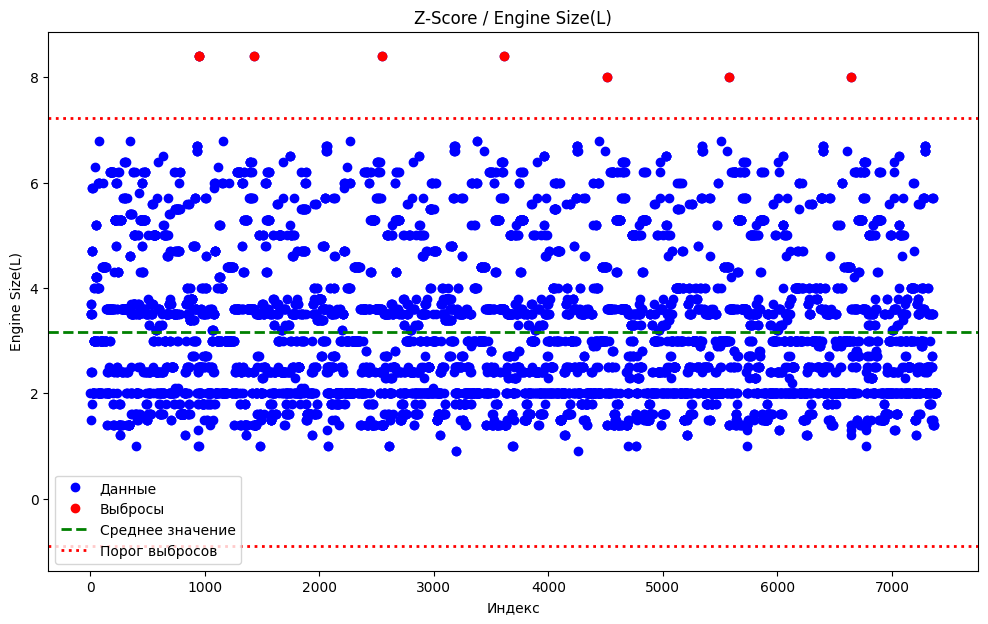

Найденные выбросы: [8.4 8.4 8.4 8.4 8.4 8.  8.  8. ]


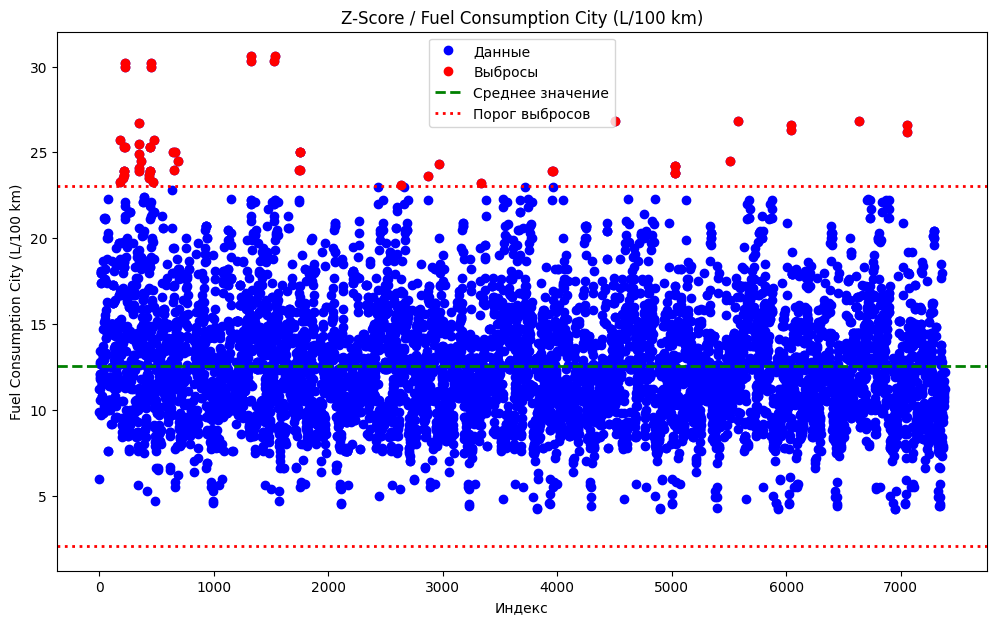

Найденные выбросы: [23.3 25.7 23.5 23.7 23.9 25.3 23.9 25.3 30.  30.2 24.1 24.9 25.5 23.9
 26.7 24.5 23.5 23.7 23.9 25.3 23.9 25.3 30.  30.2 23.3 25.7 25.  24.
 25.  24.5 30.3 30.6 30.3 30.6 24.  25.  25.  24.  23.1 23.6 24.3 23.2
 23.9 23.9 26.8 23.8 24.2 23.8 24.2 24.5 26.8 26.3 26.6 26.8 26.2 26.6]


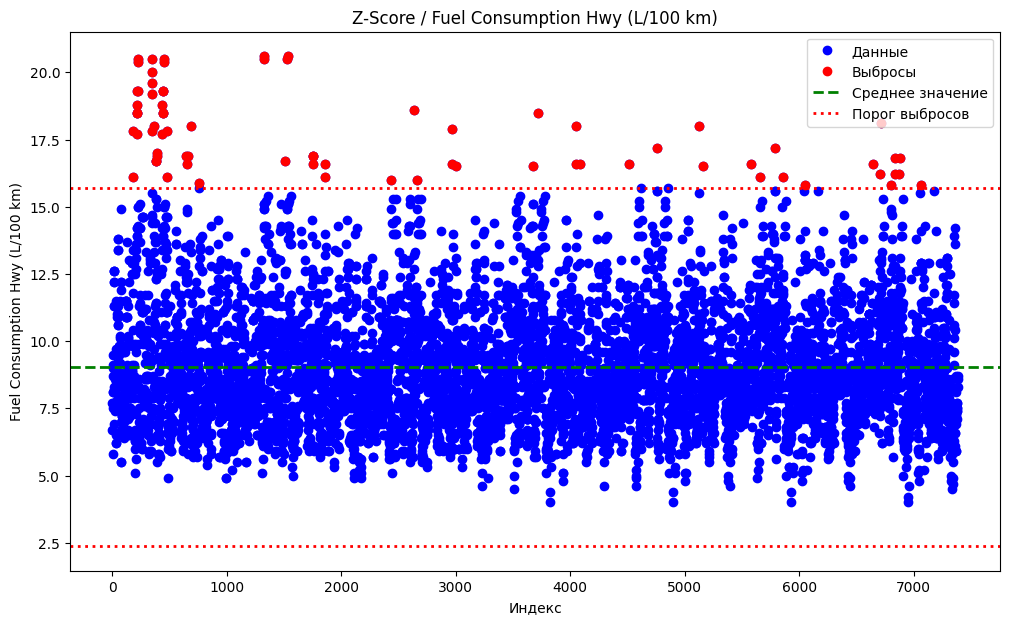

Найденные выбросы: [16.1 17.8 17.7 18.8 18.5 19.3 18.5 19.3 20.4 20.5 19.2 19.6 20.  17.8
 20.5 18.  16.7 16.7 17.  16.9 17.7 18.8 18.5 19.3 18.5 19.3 20.4 20.5
 16.1 17.8 16.9 16.6 16.9 18.  15.9 20.5 20.6 16.7 20.5 20.6 16.9 16.9
 16.6 16.1 16.6 16.  18.6 16.  16.6 17.9 16.5 16.5 18.5 16.6 18.  16.6
 16.6 17.2 18.  16.5 16.6 16.1 17.2 16.1 15.8 16.6 16.2 18.1 15.8 16.2
 16.8 16.2 16.8 15.8]


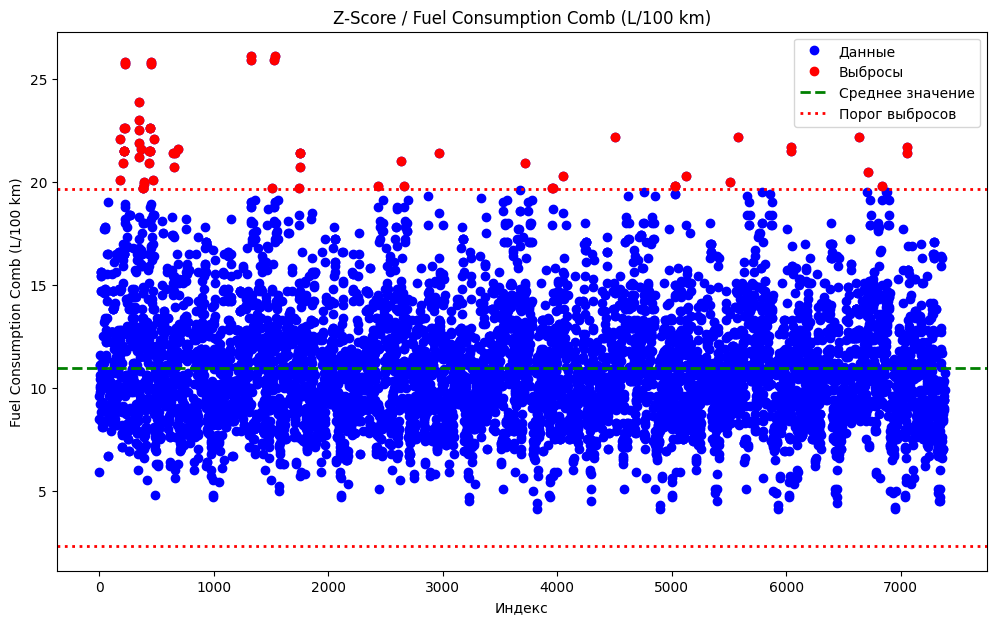

Найденные выбросы: [20.1 22.1 20.9 21.5 21.5 22.6 21.5 22.6 25.7 25.8 21.9 22.5 23.  21.2
 23.9 21.6 19.7 19.7 20.  19.9 20.9 21.5 21.5 22.6 21.5 22.6 25.7 25.8
 20.1 22.1 21.4 20.7 21.4 21.6 25.9 26.1 19.7 25.9 26.1 19.7 21.4 21.4
 20.7 19.8 21.  19.8 21.4 20.9 19.7 19.7 20.3 22.2 19.8 19.8 20.3 20.
 22.2 21.5 21.7 22.2 20.5 19.8 21.4 21.7]


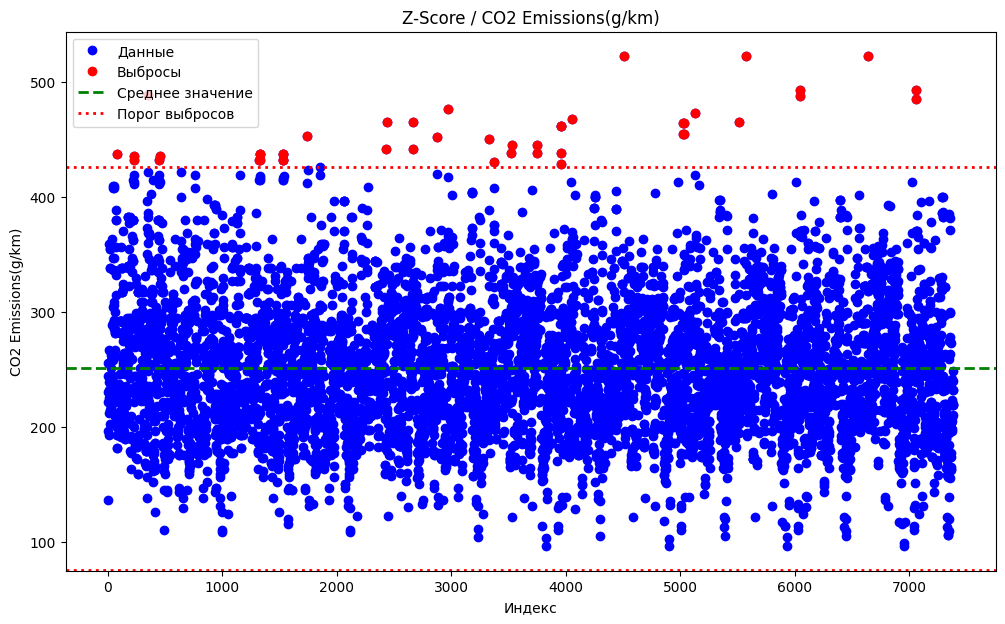

Найденные выбросы: [437 432 435 488 432 435 432 432 437 437 432 432 437 437 453 441 465 441
 465 452 476 450 430 438 445 438 445 428 461 438 461 467 522 454 464 454
 464 473 465 522 487 493 522 485 493]


In [14]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Вычисление Z-оценок
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import numpy as np
import matplotlib.pyplot as plt

X_column_anomaly = X_[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 
                       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
anomindexes = []
for nm in X_column_anomaly.columns:
    anom = CommonFunc.ZScoreAnomaly(X_[nm].to_numpy(), nm)
    anomindexes.extend(anom[0])

anomindexesset = (anomindexes)

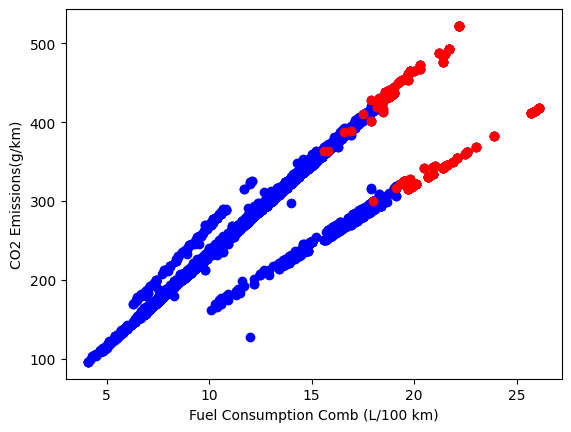

In [15]:
# Все аномальные точки собранные с графиков выше

anomvalues_co2 = [X_column_anomaly['CO2 Emissions(g/km)'][i] for i in anomindexesset]
anomvalues_consumption = [X_column_anomaly['Fuel Consumption Comb (L/100 km)'][i] for i in anomindexesset]

plt.plot(X_column_anomaly['Fuel Consumption Comb (L/100 km)'], X_column_anomaly['CO2 Emissions(g/km)'], 'bo', label='Выбросы')
plt.plot(anomvalues_consumption, anomvalues_co2, 'ro', label='Выбросы')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

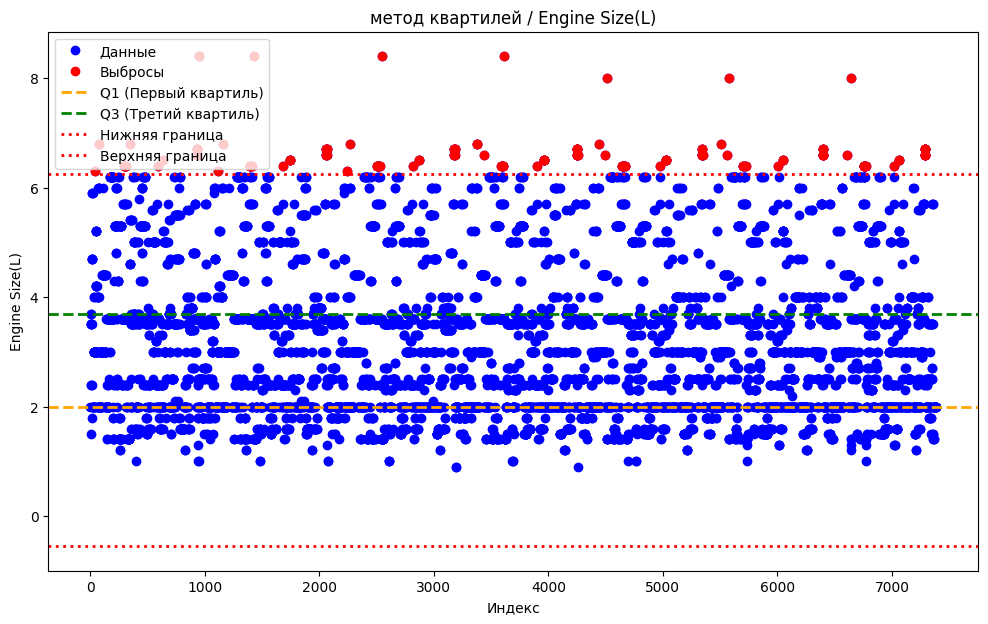

Найденные выбросы: [6.3 6.8 6.4 6.4 6.4 6.4 6.8 6.4 6.5 6.6 6.6 6.7 6.7 6.7 6.7 6.6 8.4 8.4
 6.3 6.8 6.4 6.4 6.4 6.4 6.4 8.4 6.4 6.5 6.5 6.5 6.6 6.6 6.7 6.7 6.7 6.7
 6.6 6.3 6.8 6.4 6.4 6.4 6.4 6.4 6.4 8.4 6.4 6.5 6.5 6.6 6.6 6.7 6.7 6.7
 6.7 6.6 6.8 6.8 6.6 6.4 6.4 6.4 6.4 6.4 6.4 8.4 6.4 6.5 6.5 6.5 6.5 6.6
 6.6 6.6 6.7 6.7 6.7 6.7 6.6 6.8 6.6 8.  6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4
 6.5 6.5 6.5 6.5 6.6 6.6 6.6 6.7 6.7 6.6 6.8 6.6 8.  6.4 6.4 6.4 6.4 6.4
 6.5 6.5 6.7 6.6 6.6 6.6 6.7 6.7 6.6 6.6 8.  6.4 6.4 6.4 6.4 6.4 6.4 6.4
 6.4 6.5 6.5 6.7 6.7 6.6 6.6 6.6 6.7 6.7 6.6]


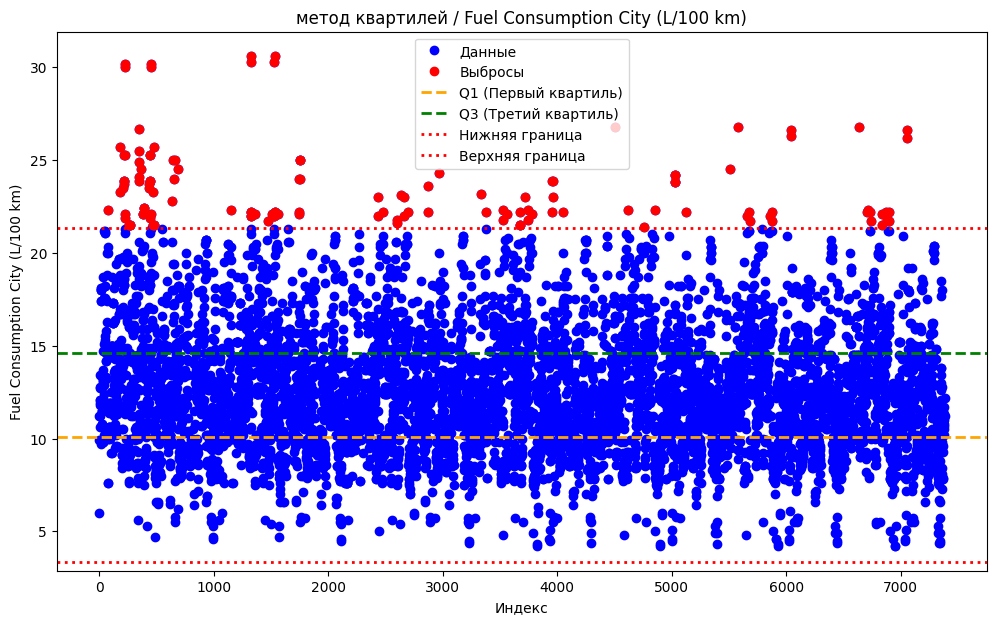

Найденные выбросы: [22.3 23.3 25.7 23.5 23.7 23.9 25.3 23.9 25.3 21.9 30.  22.1 30.2 21.5
 21.5 21.5 21.5 24.1 24.9 25.5 23.9 26.7 24.5 22.1 22.1 22.4 22.4 23.5
 23.7 23.9 25.3 23.9 25.3 21.9 30.  22.1 30.2 21.5 21.5 23.3 25.7 21.5
 21.5 22.8 25.  24.  25.  24.5 22.3 22.  22.  30.3 22.2 22.2 30.6 22.1
 21.7 22.1 22.  22.  30.3 22.2 22.2 30.6 22.1 22.2 24.  22.1 25.  25.
 24.  22.  23.  22.2 21.6 21.8 23.1 22.  23.  22.2 22.2 23.6 24.3 23.2
 22.2 21.8 22.3 22.1 21.5 21.5 22.2 23.  21.8 22.3 22.1 22.2 23.9 23.
 23.9 22.2 26.8 22.3 21.4 22.3 23.8 24.2 23.8 24.2 22.2 24.5 26.8 22.
 22.2 21.7 22.  21.7 22.2 26.3 26.6 26.8 22.2 22.3 22.2 21.7 21.5 22.1
 22.2 21.8 21.7 22.2 26.2 26.6]


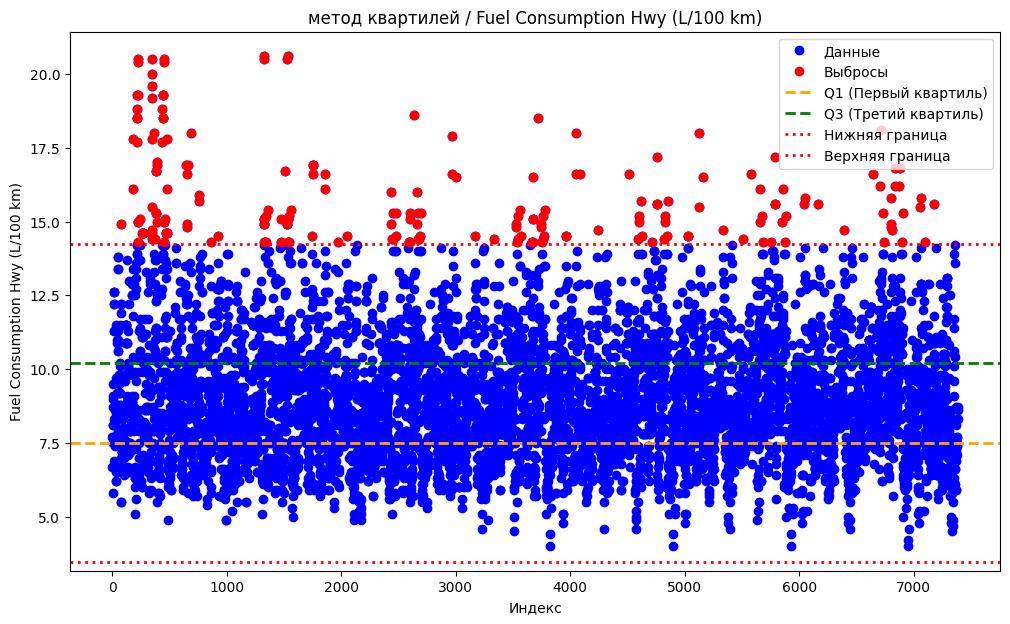

Найденные выбросы: [14.9 16.1 17.8 17.7 18.8 18.5 19.3 18.5 19.3 15.  20.4 14.3 15.  20.5
 15.1 14.6 14.6 14.6 14.6 14.4 19.2 14.7 19.6 14.6 20.  17.8 15.5 20.5
 18.  14.4 16.7 16.7 15.3 15.3 17.  16.9 15.  17.7 18.8 18.5 19.3 18.5
 19.3 15.  20.4 14.3 15.  20.5 15.1 14.6 14.6 16.1 17.8 14.6 14.6 16.9
 14.9 16.6 14.8 16.9 18.  15.9 15.7 14.3 14.5 14.9 14.9 20.5 14.3 15.1
 15.1 20.6 14.3 15.2 14.3 15.4 14.3 15.1 16.7 14.9 14.9 20.5 14.3 15.1
 15.1 20.6 14.3 15.2 14.3 15.4 14.5 16.9 16.9 16.6 16.1 16.6 14.3 14.5
 14.9 16.  14.4 15.3 14.4 15.3 14.5 14.3 14.3 14.3 15.1 15.3 18.6 14.9
 16.  14.4 15.3 14.4 14.5 15.3 16.6 17.9 16.5 14.5 14.4 14.8 14.9 14.3
 15.2 14.4 15.4 14.5 14.3 14.3 14.3 15.1 15.1 16.5 18.5 14.8 14.9 14.3
 15.2 14.4 14.5 15.4 14.5 14.5 16.6 18.  16.6 14.7 16.6 14.4 15.2 15.
 15.7 14.5 14.3 15.6 15.6 17.2 14.4 15.2 15.  14.5 15.7 14.5 14.5 15.5
 18.  16.5 14.7 14.4 16.6 15.  16.1 15.2 14.3 14.3 15.6 15.6 17.2 15.
 16.1 14.3 15.2 15.6 15.8 15.6 14.7 16.6 16.2 18.1 15.3 14.3

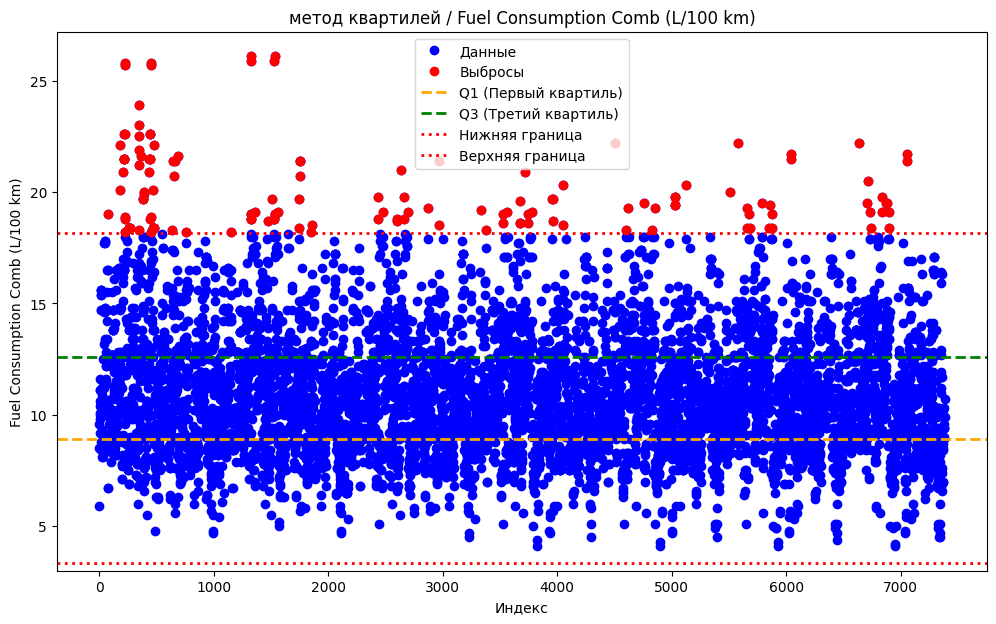

Найденные выбросы: [19.  20.1 22.1 20.9 21.5 21.5 22.6 21.5 22.6 18.8 25.7 18.2 18.9 25.8
 18.4 18.4 18.4 18.4 21.9 22.5 23.  21.2 18.3 23.9 21.6 19.7 19.7 20.
 19.9 20.9 21.5 21.5 22.6 21.5 22.6 18.8 25.7 18.2 18.9 25.8 18.4 18.4
 20.1 22.1 18.4 18.4 18.3 21.4 20.7 21.4 21.6 18.2 18.2 18.8 18.8 25.9
 19.  19.  26.1 19.1 18.7 19.7 18.8 18.8 25.9 19.  19.  26.1 19.1 19.7
 18.4 21.4 21.4 20.7 18.2 18.5 18.8 19.8 19.1 18.7 18.8 21.  18.8 19.8
 19.1 19.3 18.5 21.4 19.2 18.3 18.6 19.  19.1 18.6 18.6 19.6 20.9 18.6
 19.  19.1 19.7 18.7 19.7 18.5 20.3 22.2 18.3 19.3 19.5 18.3 19.3 19.4
 19.8 19.4 19.8 20.3 20.  22.2 18.4 19.3 19.  18.4 19.5 18.4 19.4 18.4
 19.  21.5 21.7 22.2 19.5 20.5 19.1 18.4 19.1 19.8 19.5 19.5 18.4 19.1
 21.4 21.7]


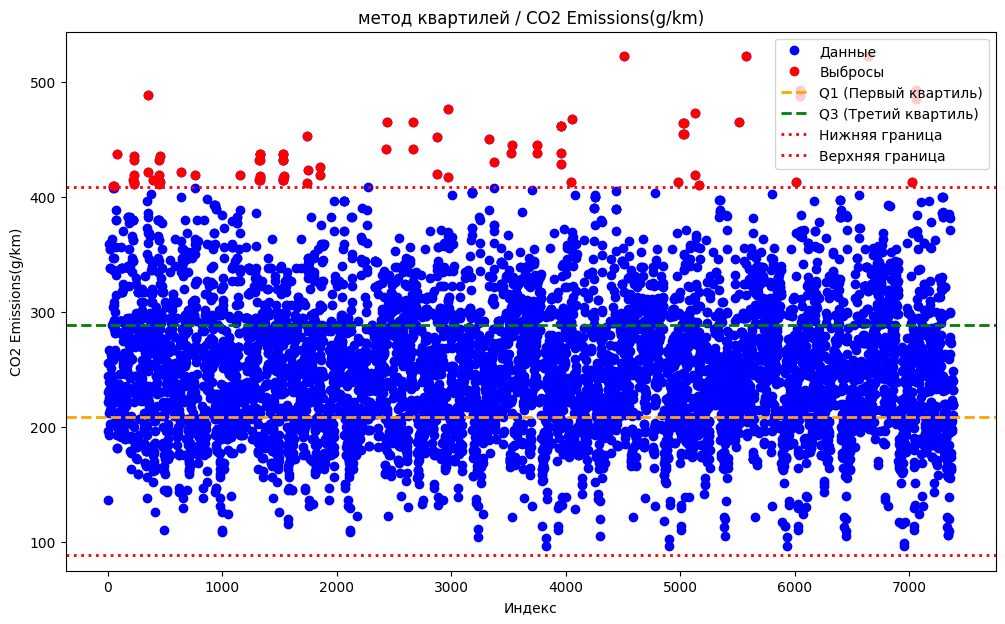

Найденные выбросы: [409 409 437 414 432 411 419 435 413 488 421 414 414 432 411 419 435 413
 421 419 419 414 432 432 414 416 437 437 418 414 432 432 414 416 437 437
 418 412 453 423 419 426 441 465 441 465 420 452 417 476 450 430 438 445
 438 445 428 461 438 461 413 467 522 413 454 464 454 464 419 473 410 465
 522 413 487 493 522 413 485 493]


In [16]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Метод квартилей
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
anomindexes = []
for nm in X_column_anomaly.columns:
    anom = CommonFunc.QuartilesAnomaly(X_[nm].to_numpy(), nm)
    anomindexes.extend(anom[0])

anomindexesset = (anomindexes)

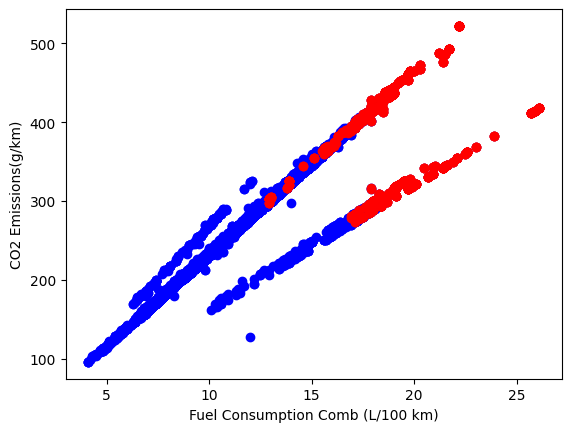

In [17]:
# Все аномальные точки собранные с графиков выше

anomvalues_co2 = [X_column_anomaly['CO2 Emissions(g/km)'][i] for i in anomindexesset]
anomvalues_consumption = [X_column_anomaly['Fuel Consumption Comb (L/100 km)'][i] for i in anomindexesset]

plt.plot(X_column_anomaly['Fuel Consumption Comb (L/100 km)'], X_column_anomaly['CO2 Emissions(g/km)'], 'bo', label='Выбросы')
plt.plot(anomvalues_consumption, anomvalues_co2, 'ro', label='Выбросы')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

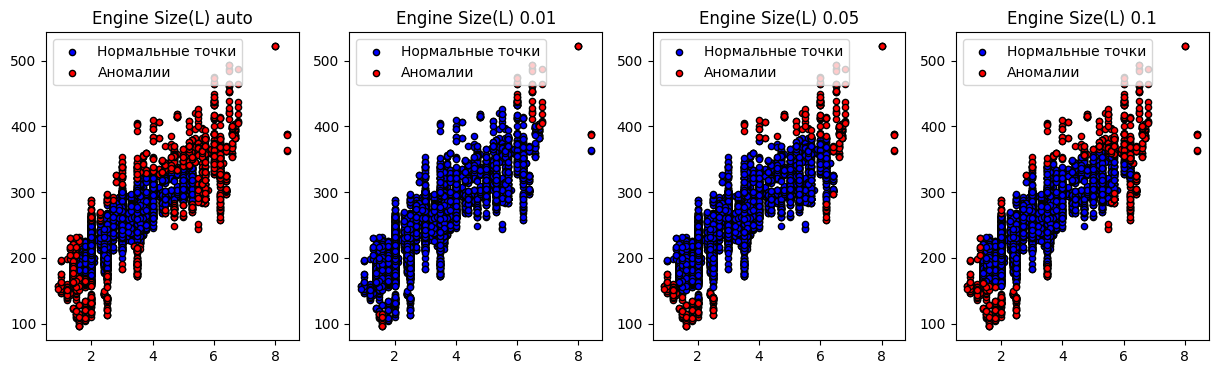

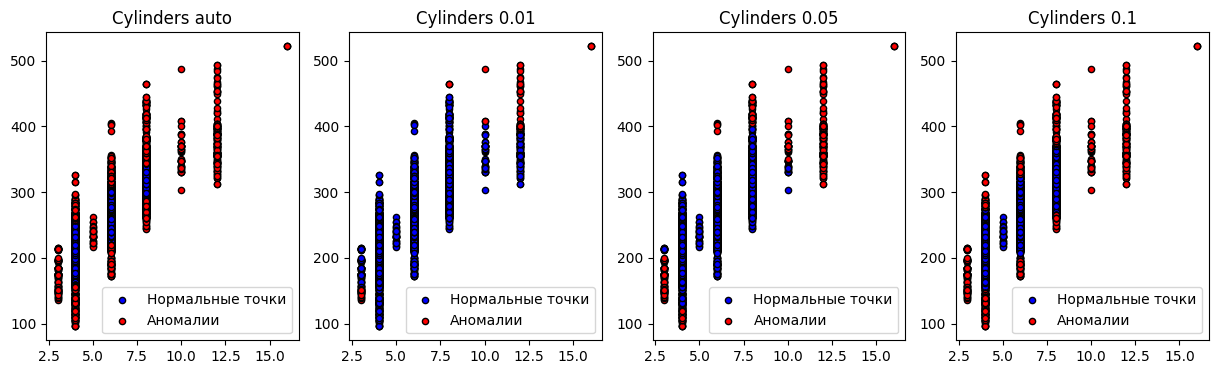

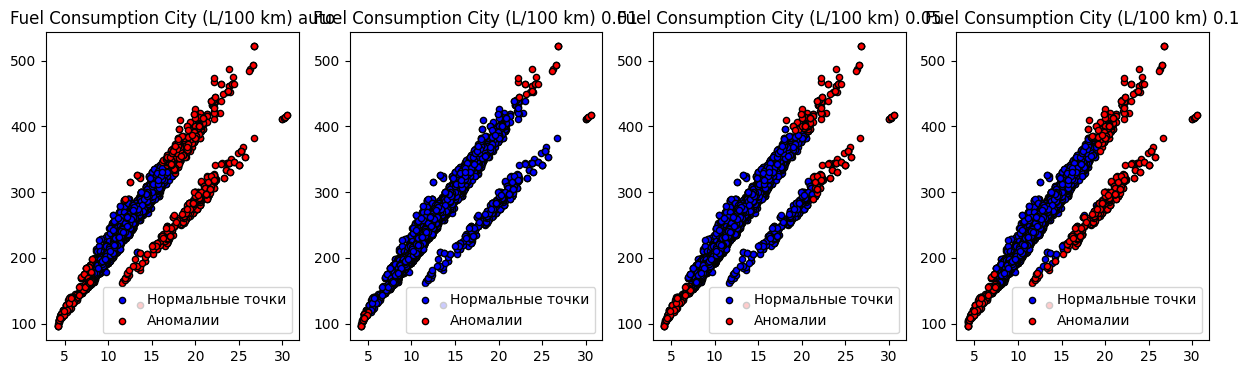

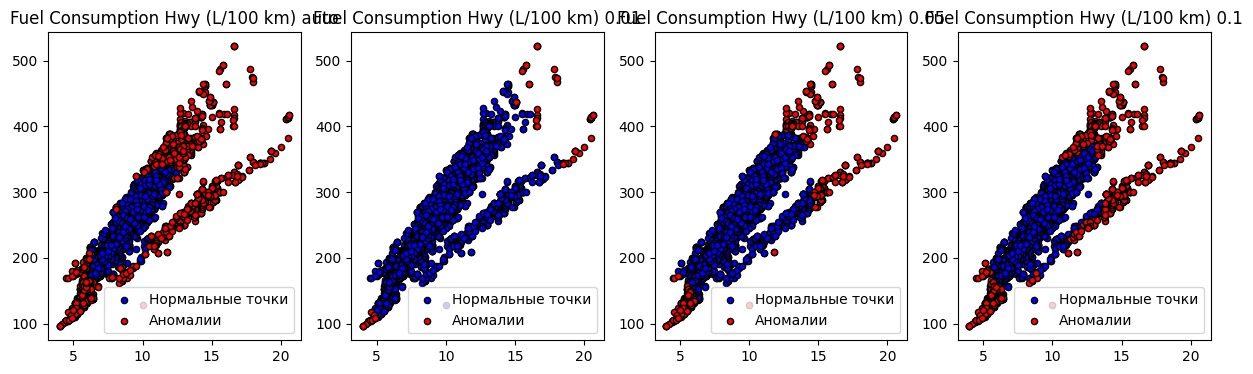

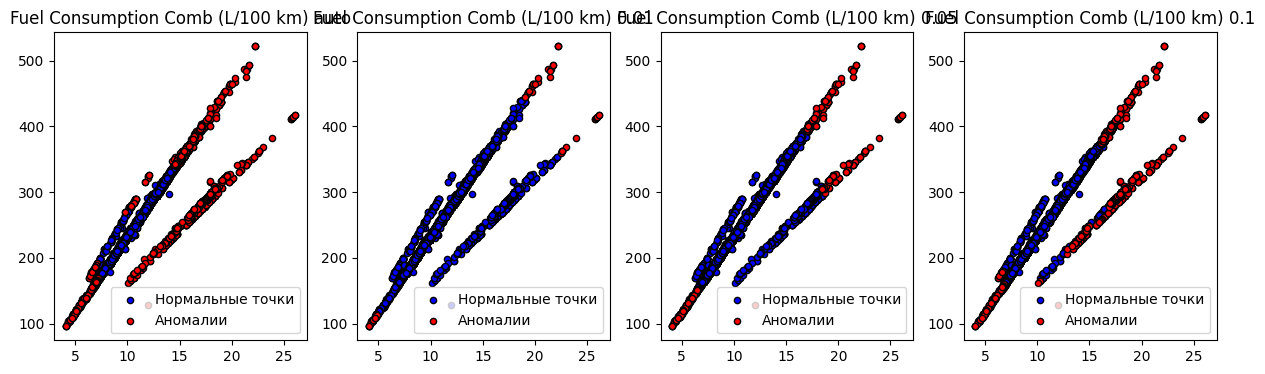

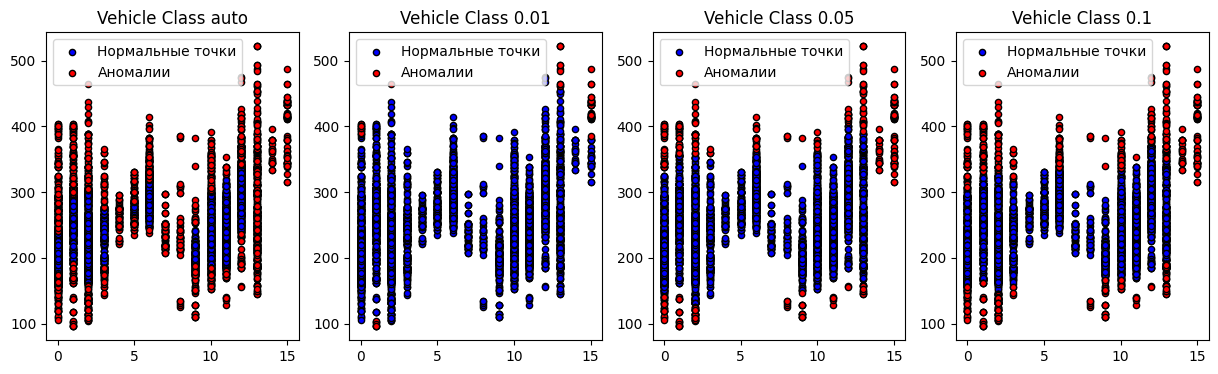

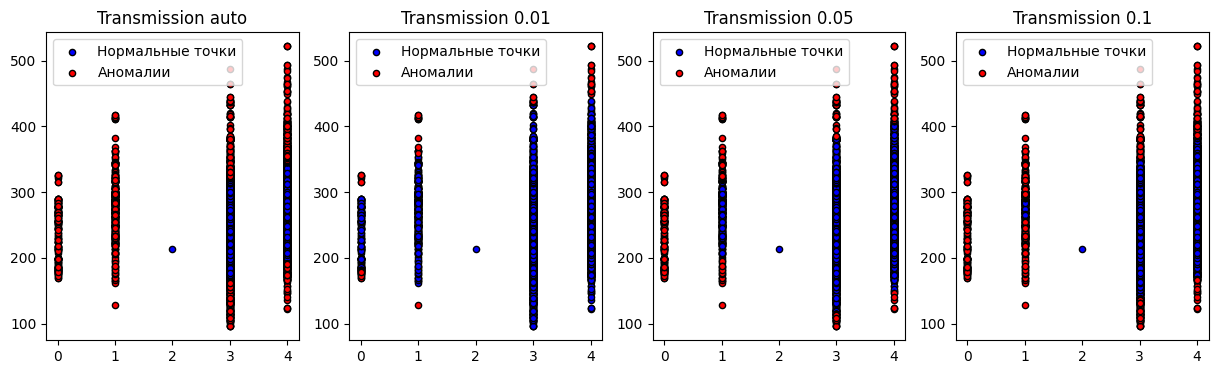

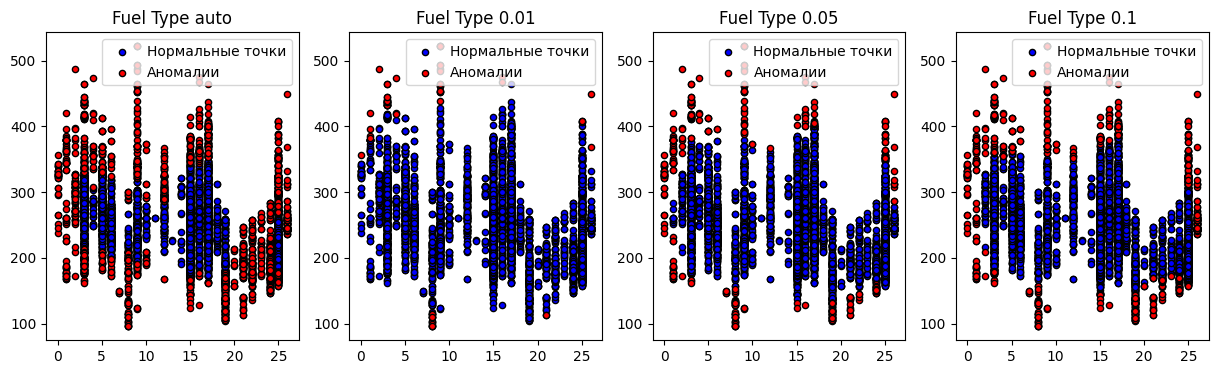

In [18]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Isolation Forest
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import numpy as np
import matplotlib.pyplot as plt

nw_x = pd.DataFrame(X_.loc[:, X_.columns != 'CO2 Emissions(g/km)'])


for nm in nw_x.columns:
    CommonFunc.AnomalyOneCategoryVisualisation(nw_x[nm], y, nm, conts = ['auto', 0.01, 0.05, 0.1])

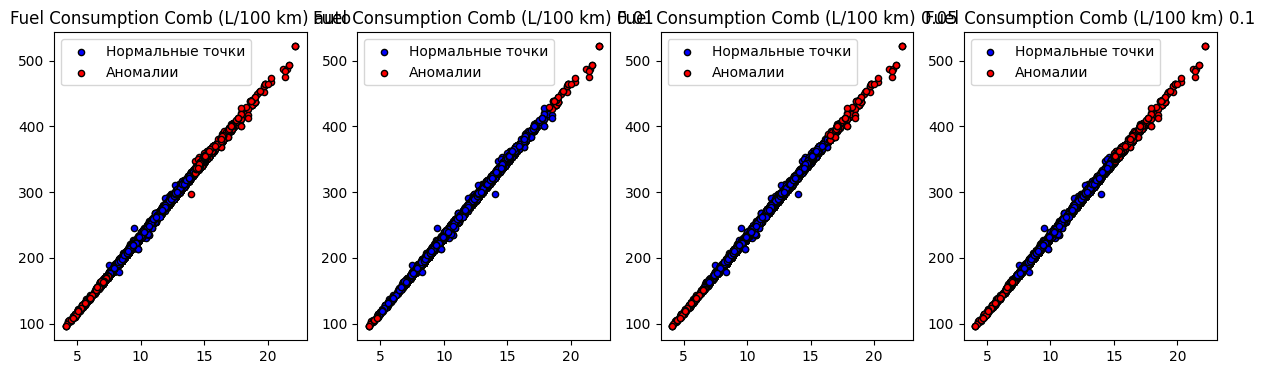

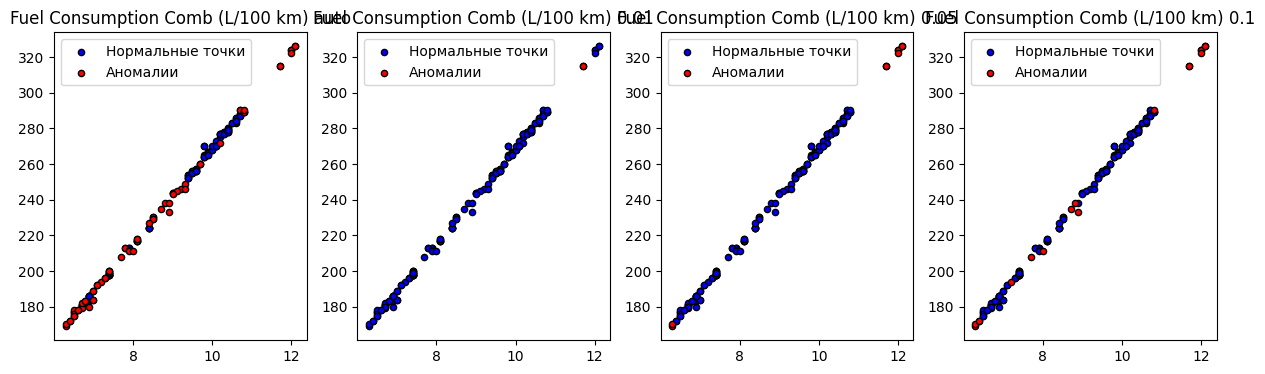

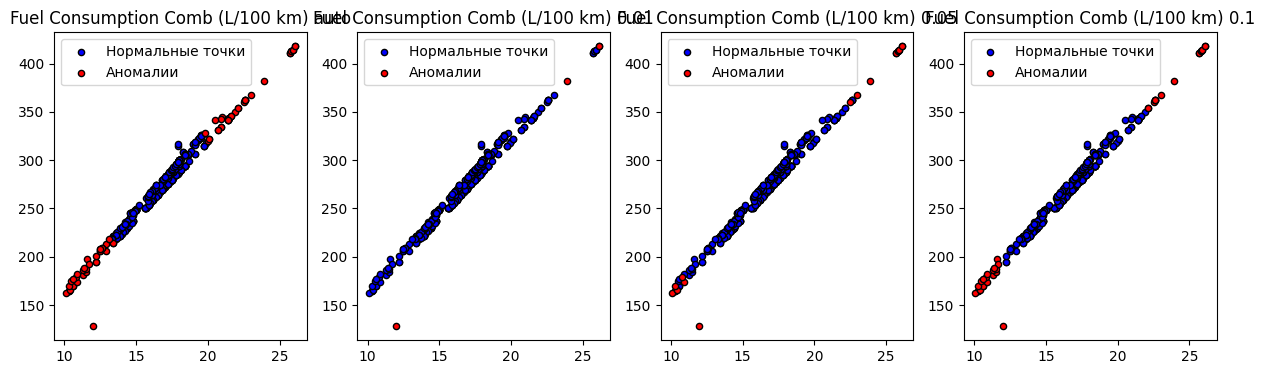

In [19]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Аномалии с Isolation Forest по каждому типу топлива
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def anomalyByFuelType(fuel_types):
    df_fuel_type = df[df['Fuel Type'].isin(fuel_types)]
    y_fuel_type = df_fuel_type[['CO2 Emissions(g/km)']].values.ravel()
    CommonFunc.AnomalyOneCategoryVisualisation(df_fuel_type['Fuel Consumption Comb (L/100 km)'], y_fuel_type, 
                                               'Fuel Consumption Comb (L/100 km)', conts = ['auto', 0.01, 0.05, 0.1])

anomalyByFuelType(['Z','X'])
anomalyByFuelType(['D'])
anomalyByFuelType(['E'])
